# Test the Gamma-Poisson model

In [1]:
using Distributions
include("VB.jl")
using VB
using PyPlot
srand(12345);

## Set up some priors and generate fake data

In [2]:
U = 10  # units
T = 100  # time points
K = 3  # HMM factors
J = 2  # HMM states

2

Generate parameters of HMMs

In [3]:
π0_data = [rand(Dirichlet(2, 5)) for k in 1:K]
A_data = [rand(MarkovMatrix([7.0 4 ; 3 6])) for k in 1:K]

3-element Array{Array{Float64,2},1}:
 2x2 Array{Float64,2}:
 0.892411  0.360028
 0.107589  0.639972
 2x2 Array{Float64,2}:
 0.69168  0.441308
 0.30832  0.558692  
 2x2 Array{Float64,2}:
 0.663668  0.409165
 0.336332  0.590835

In [4]:
z_data = [rand(MarkovChain(π0_data[k], A_data[k], T)) for k in 1:K]

3-element Array{Array{T,N},1}:
 2x100 Array{Float64,2}:
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2x100 Array{Float64,2}:
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  …  1.0  0.0  0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  1.0  0.0  0.0  1.0  1.0
 2x100 Array{Float64,2}:
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  …  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  1.0  1.0  0.0  1.0  1.0  0.0

In [5]:
z_unique = vcat([z[1, :] for z in z_data]...)

3x100 Array{Float64,2}:
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  1.0

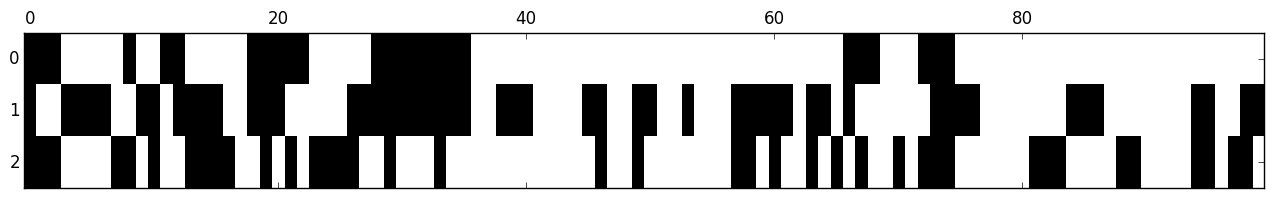

PyObject <matplotlib.image.AxesImage object at 0x323f1a050>

In [6]:
matshow(z_unique, cmap="gray", aspect="auto")